# Linear Regression Project

### Imports

In [149]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()


### Loading the data

In [150]:
data = pd.read_csv('../data/car_data.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

In [151]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [152]:
# Model has 312 unique values, we'll skip it. Also most of the relevant information considering Model can be found in Brand, Year and Engine stats
data = data.drop(['Model'], axis = 1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Missing values

In [153]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [154]:
# We'll remove the missing value rows. Its generally okay when < 5% of rows have missing values
data_complete = data.dropna(axis = 0)

In [155]:
data_complete.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [156]:
data_complete.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Probability distribution functions

##### Price

<Axes: xlabel='Price', ylabel='Count'>

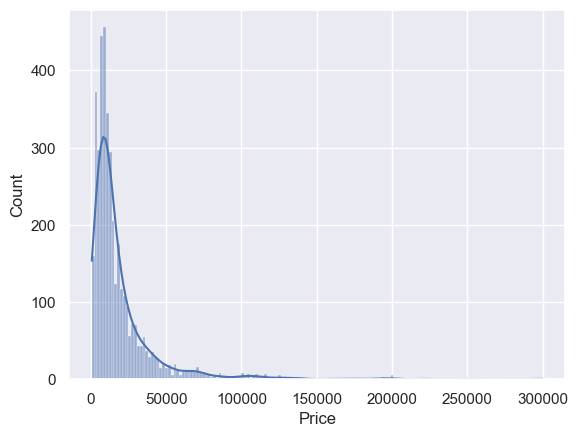

In [157]:
sns.histplot(data_complete['Price'], kde=True)

In [158]:
# Eliminate outliers by removing top percentile from data.
q = data_complete['Price'].quantile(0.99)
q

129812.51999999981

In [159]:
data_1 = data_complete[data_complete['Price'] < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Count'>

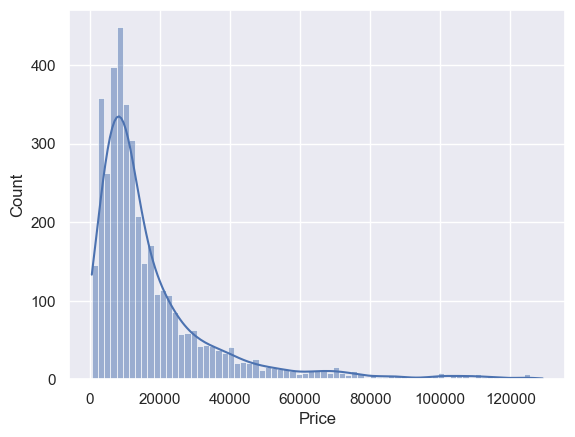

In [160]:
sns.histplot(data_1['Price'], kde=True)

##### Mileage

<Axes: xlabel='Mileage', ylabel='Count'>

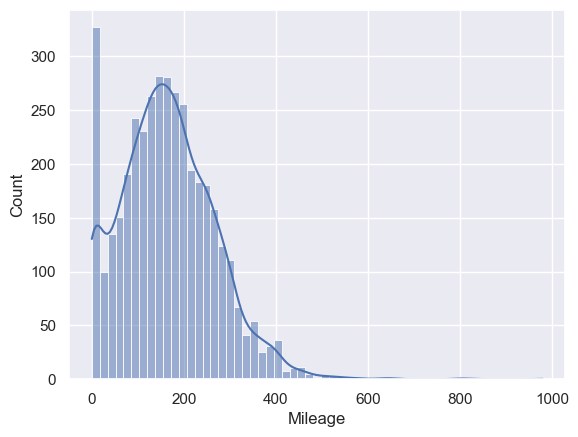

In [161]:
sns.histplot(data_1['Mileage'], kde=True)

In [162]:
# Same as with price, we eliminate outliers by not including the top 1%
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]

In [163]:
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Mileage', ylabel='Count'>

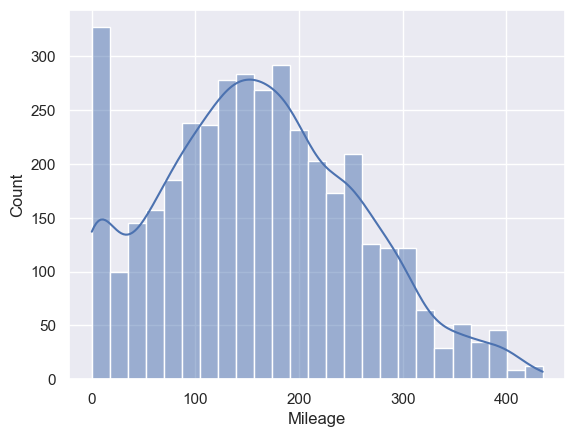

In [164]:
sns.histplot(data_2['Mileage'], kde=True)

##### Engine Volume

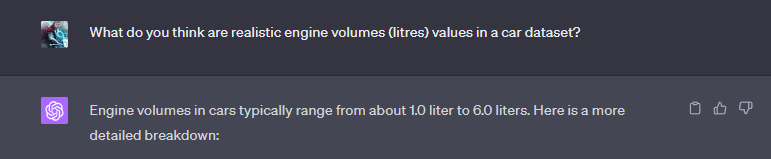

<Axes: xlabel='EngineV', ylabel='Count'>

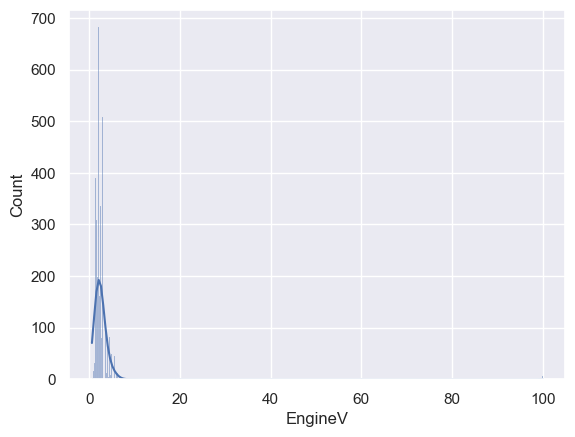

In [165]:
sns.histplot(data_2['EngineV'], kde=True)

In [166]:
data_3 = data_2[data_2['EngineV']<=6.0]

In [167]:
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3905,3905.000000,3905,3905.000000,3905.000000,3905,3905,3905.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1490,NaN,NaN,1818,3543,NaN
mean,NaN,17871.728543,NaN,161.573624,2.427772,NaN,NaN,2006.394110
std,NaN,18960.095237,NaN,96.114429,0.915612,NaN,NaN,6.605474
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<Axes: xlabel='EngineV', ylabel='Count'>

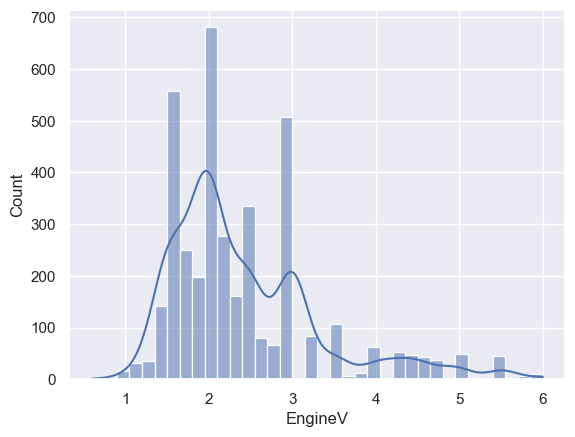

In [168]:
sns.histplot(data_3['EngineV'], kde=True)

##### Year

<Axes: xlabel='Year', ylabel='Count'>

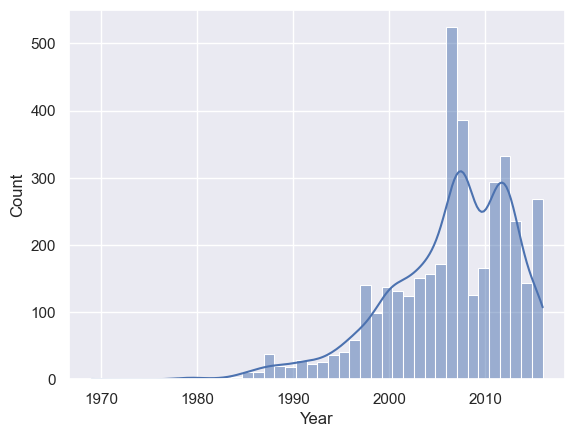

In [169]:
sns.histplot(data_3['Year'], kde = True)

In [170]:
# This time we'll remove the top 1% oldest cars
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

<Axes: xlabel='Year', ylabel='Count'>

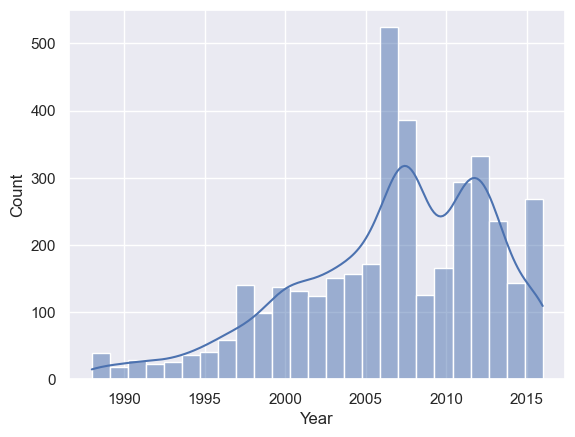

In [171]:
sns.histplot(data_4['Year'], kde = True)

In [172]:
# Checkpoint for complete(no missing values) and cleaned data
# Reset index to fix missing indexes from removing rows. drop=True drops the old index
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994


In [173]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3851,3851.00000,3851,3851.000000,3851.000000,3851,3851,3851.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1458,NaN,NaN,1807,3489,NaN
mean,NaN,18076.98263,NaN,160.837445,2.434524,NaN,NaN,2006.699039
std,NaN,19004.80061,NaN,95.680787,0.918583,NaN,NaN,6.112839
min,NaN,800.00000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.00000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.00000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.00000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


### Checking OLS assumptions

1. Linearity
2. No endogeneity
3. Normality and homoscedasticity
4. No autocorrelation
5. No multicollinearity


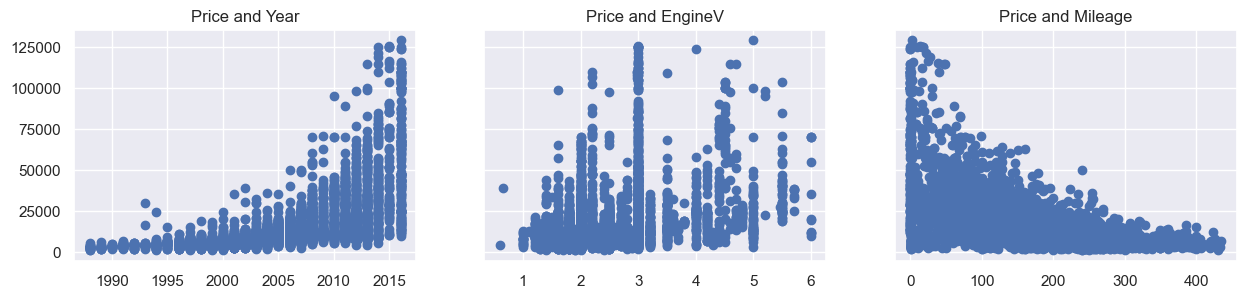

In [174]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

<Axes: xlabel='Price', ylabel='Count'>

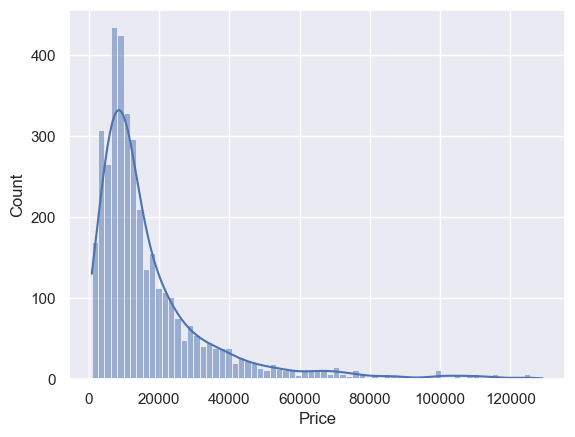

In [175]:
sns.histplot(data_cleaned['Price'], kde = True)

### Applying Log Transformation

In [176]:
log_price = np.log(data_cleaned['Price'])
log_price

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3846     9.350102
3847     9.792556
3848    11.736069
3849     8.779557
3850     9.510445
Name: Price, Length: 3851, dtype: float64

In [177]:
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3846,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3847,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3848,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3849,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'Log Price and Mileage')

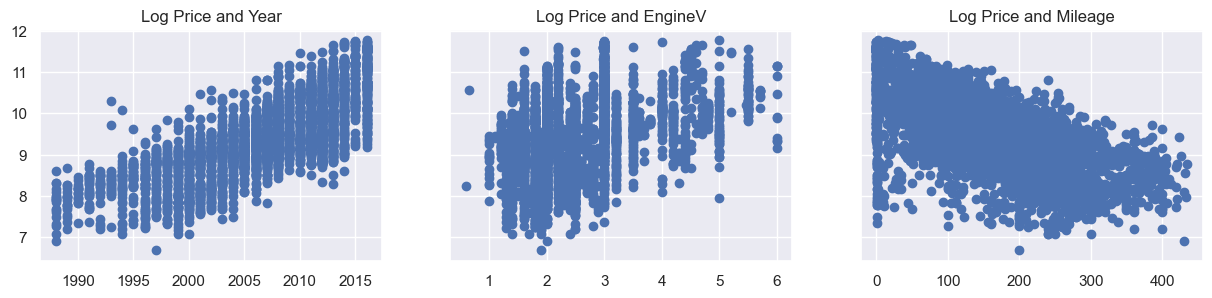

In [178]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

1. Linearity - Check
2. No endogeneity - Assume check hehe
3. Normality - Check, central limit theorem, n = 3850
3. Homoscedasticity - Check, variance remains the same
4. No autocorrelation - Check, observations not from time series data, observations are not dependant on eachother
5. Multicollinearity - Uncheck

In [179]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

### Multicollinearity

In [180]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [182]:
vif

,VIF,features
0,3.800838,Mileage
1,10.607002,Year
2,8.026645,EngineV


##### Dropping Year

* Roughly the VIF table:
    * VIF = 1 - No multicollinearity
    * VIF = 1-5 - Generally fine
    * VIF > 5 There is some multicollinearity



In [183]:
data_cleaned_2 = data_cleaned.drop(['Year'], axis=1)

## Dummy variables

* Keep in mind if we have N categories there will only be N-1 dummies. This because when all dummies are zero that represents the last category without a dummy

In [184]:
data_dummies = pd.get_dummies(data_cleaned_2, drop_first = True)

In [185]:
data_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


##### Some rearranging

In [186]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [187]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [188]:
data_preprocessed = data_dummies[cols]

In [189]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression



In [190]:
# Target = Dependant variable/output
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

##### Scaling

In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [193]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 1.2142212 , -0.4730981 ,  2.27408759, ..., -0.16159345,
         1.33963797,  0.3221097 ],
       [ 2.78213764,  0.50679893, -0.4397368 , ..., -0.16159345,
        -0.74647033,  0.3221097 ],
       [ 2.06089608,  2.79322533, -0.4397368 , ..., -0.16159345,
        -0.74647033,  0.3221097 ],
       ...,
       [-1.58712284,  0.61567638, -0.4397368 , ..., -0.16159345,
        -0.74647033,  0.3221097 ],
       [-1.67074505,  1.16006362,  2.27408759, ..., -0.16159345,
         1.33963797,  0.3221097 ],
       [-0.38505357, -0.4730981 , -0.4397368 , ..., -0.16159345,
        -0.74647033,  0.3221097 ]])

##### Train Test Split

In [194]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 123)

##### Regression

In [195]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [196]:
y_hat = reg.predict(x_train)

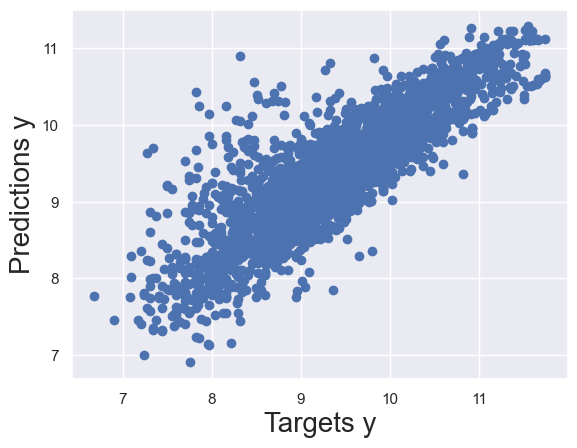

In [197]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets y', size = 20)
plt.ylabel('Predictions y', size = 20)
plt.show()

* Not perfect but decent at least!

In [198]:
reg.score(x_train, y_train)

0.7472104898103717

* Our model is explaining roughly 74.7% of the variability of the data

##### Weights and Bias

In [199]:
# Weights
reg.coef_

array([-0.45824742,  0.20803363,  0.02098353,  0.02036662, -0.13849303,
       -0.17991677, -0.0568643 , -0.08414946, -0.1426576 , -0.09643227,
       -0.19455264, -0.12202955, -0.15785349, -0.12467105, -0.02985434,
       -0.15353141,  0.31705473])

In [200]:
reg_summary = pd.DataFrame(data = inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.458247
1,EngineV,0.208034
2,Brand_BMW,0.020984
3,Brand_Mercedes-Benz,0.020367
4,Brand_Mitsubishi,-0.138493
5,Brand_Renault,-0.179917
6,Brand_Toyota,-0.056864
7,Brand_Volkswagen,-0.084149
8,Body_hatch,-0.142658
9,Body_other,-0.096432


* A positive weight shows increase in Log_price / Price as feature increases
* A negative weight shows decrease in Log_price / Price as feature increases

In [201]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

* We are missing Audi in the weights dataframe -> **Audi is the benchmark**
* This means that on average any positive weight brand is more expensive than Audi: BMW, Mercedes-Benz
* And any negative weight is less expensive than Audi

## Testing

In [202]:
y_hat_test = reg.predict(x_test)

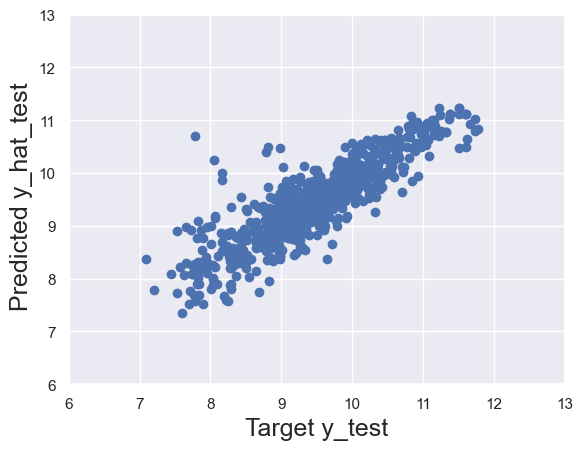

In [203]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Target y_test', size = 18)
plt.ylabel(' Predicted y_hat_test', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

* Looks like the model is slightly better at predicting higher value cars. Overall decent!

In [204]:
df_performance = pd.DataFrame(data = y_hat_test, columns = ['Prediction'])
df_performance.head(10)

,Prediction
0,8.629498
1,10.803414
2,9.065336
3,9.554122
4,9.004823
5,9.716574
6,8.794341
7,8.879239
8,10.382025
9,9.455513


In [205]:
# To get rid of log we can use np.exp()
df_performance = np.exp(df_performance)

In [206]:
df_performance

,Prediction
0,5594.270083
1,49188.459766
2,8650.188036
3,14102.705215
4,8142.259429
...,...
766,36287.035294
767,10873.998910
768,3842.831920
769,8567.093268


In [207]:
# Add target
df_performance['Target'] = np.exp(y_test)

In [208]:
df_performance.head(25)

,Prediction,Target
0,5594.270083,NaN
1,49188.459766,NaN
2,8650.188036,NaN
3,14102.705215,NaN
4,8142.259429,NaN
5,16590.313783,NaN
6,6596.806617,NaN
7,7181.320430,NaN
8,32274.260712,NaN
9,12778.420398,NaN


In [209]:
# Get rid of indices. Pandas tries to match the indices and thats why we have many empty targets.
y_test
y_test = y_test.reset_index(drop=True)

In [210]:
# Overwrite
df_performance['Target'] = np.exp(y_test)

In [211]:
df_performance.head(10)

,Prediction,Target
0,5594.270083,7800.0
1,49188.459766,59900.0
2,8650.188036,12250.0
3,14102.705215,15300.0
4,8142.259429,7000.0
5,16590.313783,28500.0
6,6596.806617,8400.0
7,7181.320430,10900.0
8,32274.260712,24700.0
9,12778.420398,9800.0


* Amazing

##### Add Residuals

* Residual = Target - Prediction

In [212]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']

In [213]:
df_performance.head(10)

,Prediction,Target,Residual
0,5594.270083,7800.0,2205.729917
1,49188.459766,59900.0,10711.540234
2,8650.188036,12250.0,3599.811964
3,14102.705215,15300.0,1197.294785
4,8142.259429,7000.0,-1142.259429
5,16590.313783,28500.0,11909.686217
6,6596.806617,8400.0,1803.193383
7,7181.320430,10900.0,3718.679570
8,32274.260712,24700.0,-7574.260712
9,12778.420398,9800.0,-2978.420398


In [214]:
# Also adding the residual/difference percentage absolute - How much bigger or smaller it is than the target.
df_performance['Difference%'] = np.absolute(df_performance['Residual']/df_performance['Target']*100)

In [215]:
df_performance.head(10)

,Prediction,Target,Residual,Difference%
0,5594.270083,7800.0,2205.729917,28.278589
1,49188.459766,59900.0,10711.540234,17.882371
2,8650.188036,12250.0,3599.811964,29.386220
3,14102.705215,15300.0,1197.294785,7.825456
4,8142.259429,7000.0,-1142.259429,16.317992
5,16590.313783,28500.0,11909.686217,41.788373
6,6596.806617,8400.0,1803.193383,21.466588
7,7181.320430,10900.0,3718.679570,34.116326
8,32274.260712,24700.0,-7574.260712,30.665023
9,12778.420398,9800.0,-2978.420398,30.392045


In [216]:
df_performance.describe()

,Prediction,Target,Residual,Difference%
count,771.000000,771.000000,771.000000,771.000000
mean,16460.303307,18301.798651,1841.495344,36.972992
std,13316.955302,19319.312132,10207.598651,82.517929
min,1549.398586,1200.000000,-41972.969421,0.002043
25%,7552.467879,7300.000000,-2367.414606,10.786307
50%,12209.039700,11800.000000,169.144628,23.593596
75%,20958.857784,22000.000000,3291.747332,39.579408
max,75698.264736,129222.000000,78036.973105,1748.873726


* Clearly have something weird going on max difference being 1750%

In [218]:
df_performance.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
496,44372.969421,2400.0,-41972.969421,1748.873726
383,28272.172665,3150.0,-25122.172665,797.529291
161,21890.030199,3500.0,-18390.030199,525.429434
370,19381.639168,3500.0,-15881.639168,453.761119
632,36226.048461,6700.0,-29526.048461,440.687290
...,...,...,...,...
150,6019.150067,6000.0,-19.150067,0.319168
765,12870.521492,12900.0,29.478508,0.228516
54,21356.763569,21335.0,-21.763569,0.102009
339,7499.482394,7500.0,0.517606,0.006901


In [219]:
# Show the whole df
pd.options.display.max_rows = 999
# %.2f format - 2 decimals after dot
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# THE END - Just 771 rows of dataframe below

* Looks like the prediction is generally bad at predicting prices for cheap cars.
* There could be other features like condition that we do not have in our dataset.
* Right now our only feature effectively driving price down is Mileage.

In [220]:
df_performance.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
496,44372.97,2400.00,-41972.97,1748.87
383,28272.17,3150.00,-25122.17,797.53
161,21890.03,3500.00,-18390.03,525.43
370,19381.64,3500.00,-15881.64,453.76
632,36226.05,6700.00,-29526.05,440.69
578,32695.37,6500.00,-26195.37,403.01
457,35216.73,8000.00,-27216.73,340.21
197,7373.34,1850.00,-5523.34,298.56
235,7900.33,2100.00,-5800.33,276.21
751,4364.94,1200.00,-3164.94,263.75
